In [1]:
pip install pyEX

  Stored in directory: C:\Users\KAUSTUBH JHA\AppData\Local\pip\Cache\wheels\e2\69\fc\42cf24c682bfeeedbc882da25eb1166b5e84313d557a03978f
  Stored in directory: C:\Users\KAUSTUBH JHA\AppData\Local\pip\Cache\wheels\2b\51\69\ebb2c982c9bce057173960e73c22bcd6ee314f76106b3b5524
Successfully built pyEX sseclient
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [3]:
import matplotlib.dates as mdates

In [4]:
import seaborn as sns

In [5]:
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [6]:
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [7]:
data = pd.read_pickle('data.pkl')

C:\newAnaconda\lib\site-packages\pandas\core\indexes\base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


In [8]:
data.head()

cue  action  reward
subject trial                     
4       0        0       3      23
        1        1       2      14
        2        0       1       8
        3        0       0      -3
        4        1       1      -8

In [9]:
short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)

cue  action  reward
subject trial                      
4       0       NaN     NaN     NaN
        1       NaN     NaN     NaN
        2       NaN     NaN     NaN
        3       NaN     NaN     NaN
        4       NaN     NaN     NaN
        5       NaN     NaN     NaN
        6       NaN     NaN     NaN
        7       NaN     NaN     NaN
        8       NaN     NaN     NaN
        9       NaN     NaN     NaN
        10      NaN     NaN     NaN
        11      NaN     NaN     NaN
        12      NaN     NaN     NaN
        13      NaN     NaN     NaN
        14      NaN     NaN     NaN
        15      NaN     NaN     NaN
        16      NaN     NaN     NaN
        17      NaN     NaN     NaN
        18      NaN     NaN     NaN
        19     0.95     1.9   -1.65

In [10]:
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

cue  action  reward
subject trial                      
69      355    0.97    1.28    4.46
        356    0.97    1.29    4.51
        357    0.98    1.30    4.46
        358    0.98    1.30    4.46
        359    0.99    1.27    4.20

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

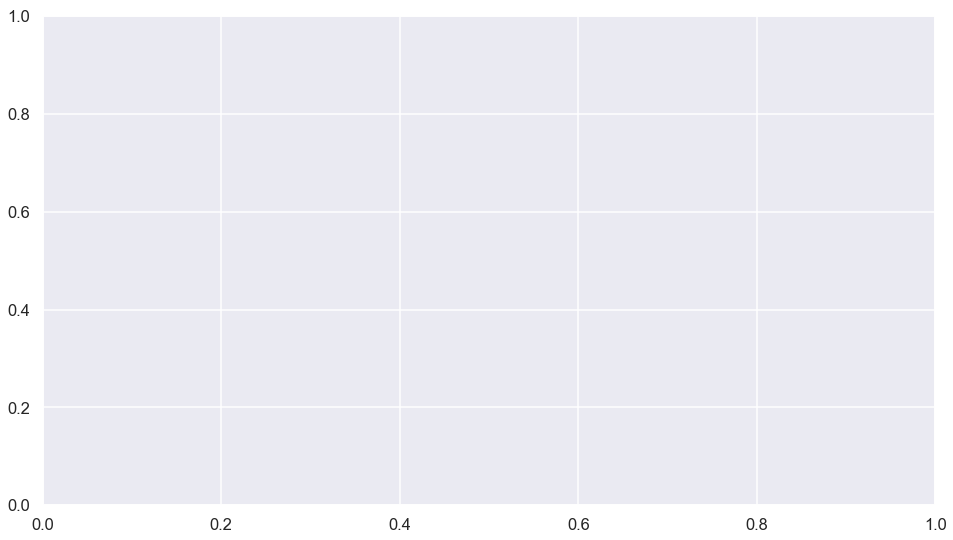

In [15]:
start_date = 4
end_date = 69

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'action'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'action'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'action'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)